This notebook will be for the **Applied Data Science Capstone** project

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

print("Hello Capstone Project Course")

Hello Capstone Project Course


In [2]:
!wget -O car_crash.csv https://data.ny.gov/resource/e8ky-4vqe.csv

--2020-09-25 17:59:17--  https://data.ny.gov/resource/e8ky-4vqe.csv
Resolving data.ny.gov (data.ny.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.ny.gov (data.ny.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘car_crash.csv’

    [ <=>                                   ] 239,457     --.-K/s   in 0.09s   

2020-09-25 17:59:19 (2.41 MB/s) - ‘car_crash.csv’ saved [239457]



In [3]:
df = pd.read_csv('car_crash.csv')
df.head()

,year,accident_descriptor,time,date,day_of_week,police_report,lighting_conditions,municipality,collision_type_descriptor,county_name,road_descriptor,weather_conditions,traffic_control_device,road_surface_conditions,dot_reference_marker_location,pedestrian_bicyclist_action,event_descriptor,number_of_vehicles_involved
0,2016,Property Damage Accident,7:45,2016-12-31T00:00:00.000,Saturday,Y,Daylight,ELMSFORD,OTHER,WESTCHESTER,Curve and Grade,Clear,None,Snow/Ice,987D87012063,Not Applicable,"Median - Not At End, Collision With Fixed Object",1
1,2016,Injury Accident,20:40,2016-12-31T00:00:00.000,Saturday,Y,Dark-Road Lighted,QUEENS,REAR END,QUEENS,Straight and Level,Clear,Traffic Signal,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2016,Property Damage Accident,20:08,2016-12-31T00:00:00.000,Saturday,Y,Dark-Road Unlighted,PARMA,OTHER,MONROE,Straight at Hill Crest,Cloudy,None,Wet,261 43011056,Not Applicable,Deer,1
3,2016,Property Damage & Injury Accident,22:45,2016-12-31T00:00:00.000,Saturday,Y,Dark-Road Lighted,KINGS,RIGHT ANGLE,KINGS,Straight and Level,Clear,Stop Sign,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
4,2016,Injury Accident,1:02,2016-12-31T00:00:00.000,Saturday,Y,Dark-Road Lighted,KINGS,OTHER,KINGS,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2


In [4]:

df.drop(columns=[ 'event_descriptor', 'pedestrian_bicyclist_action', 'dot_reference_marker_location', 'year', 'time', 'day_of_week', 'police_report', 'municipality', 'county_name', 'road_descriptor'], inplace=True)
df.dtypes



accident_descriptor            object
date                           object
lighting_conditions            object
collision_type_descriptor      object
weather_conditions             object
traffic_control_device         object
road_surface_conditions        object
number_of_vehicles_involved     int64
dtype: object

In [5]:
df['accident_descriptor'].replace(to_replace=['Property Damage Accident','Injury Accident','Property Damage & Injury Accident','Fatal Accident'], value=[0,1,1,1],inplace=True)



In [6]:
from sklearn.utils import resample
df_accident0 = df[df.accident_descriptor==0]
df_accident1 = df[df.accident_descriptor==1]
df_accident1_upsampled = resample(df_accident1, 
                                 replace=True,     
                                 n_samples=614,    
                                 random_state=123)

df_upsampled = pd.concat([df_accident0, df_accident1_upsampled])
df_upsampled.accident_descriptor.value_counts()
df_upsampled.head()


,accident_descriptor,date,lighting_conditions,collision_type_descriptor,weather_conditions,traffic_control_device,road_surface_conditions,number_of_vehicles_involved
0,0,2016-12-31T00:00:00.000,Daylight,OTHER,Clear,None,Snow/Ice,1
2,0,2016-12-31T00:00:00.000,Dark-Road Unlighted,OTHER,Cloudy,None,Wet,1
6,0,2016-12-31T00:00:00.000,Dusk,OTHER,Clear,No Passing Zone,Wet,1
8,0,2016-12-31T00:00:00.000,Daylight,SIDESWIPE,Cloudy,None,Dry,2
9,0,2016-12-31T00:00:00.000,Unknown,LEFT TURN (0),Unknown,Unknown,Unknown,2


In [7]:

df_upsampled['lighting_conditions'].replace(to_replace=['Daylight','Dark-Road Lighted','Dark-Road Unlighted', 'Unknown','Dusk','Dawn'], value=[0,1,2,3,4,5],inplace=True)
df_upsampled['weather_conditions'].replace(to_replace=['Clear','Cloudy','Snow','Unknown', 'Rain', 'Sleet/Hail/Freezing Rain', 'Other*', ], value=[0,1,2,3,4,5,6],inplace=True)
df_upsampled['traffic_control_device'].replace(to_replace=['None', 'Traffic Signal','No Passing Zone', 'Unknown', 'Stop Sign', 'Other', 'Yield Sign', 'Flashing Light','Police/Fire Emergency', 
                                                          'Officer/Guard'], value=[0,1,2,3,4,5,6,7,8,9,],inplace=True)
df_upsampled['road_surface_conditions'].replace(to_replace=['Dry','Snow/Ice','Wet', 'Unknown','Slush'], value=[0,1,2,3,4,],inplace=True)
df_upsampled['collision_type_descriptor'].replace(to_replace=['OTHER', 'REAR END','RIGHT ANGLE','SIDESWIPE','LEFT TURN (0)', 'LEFT TURN (3)', 
                                                            'OVERTAKING', 'RIGHT TURN (5)', 'HEAD ON', 'RIGHT TURN (6)', 'Unknown', ], value=[0,1,2,3,4,5,6,7,8,9, 10],inplace=True)
                                                         
df_upsampled.head()

,accident_descriptor,date,lighting_conditions,collision_type_descriptor,weather_conditions,traffic_control_device,road_surface_conditions,number_of_vehicles_involved
0,0,2016-12-31T00:00:00.000,0,0,0,0,1,1
2,0,2016-12-31T00:00:00.000,2,0,1,0,2,1
6,0,2016-12-31T00:00:00.000,4,0,0,2,2,1
8,0,2016-12-31T00:00:00.000,0,3,1,0,0,2
9,0,2016-12-31T00:00:00.000,3,4,3,3,3,2


In [8]:
!conda install -c anaconda seaborn -y
import seaborn as sns


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1h-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

df_weather = df_upsampled[df_upsampled['weather_conditions'] < 3]

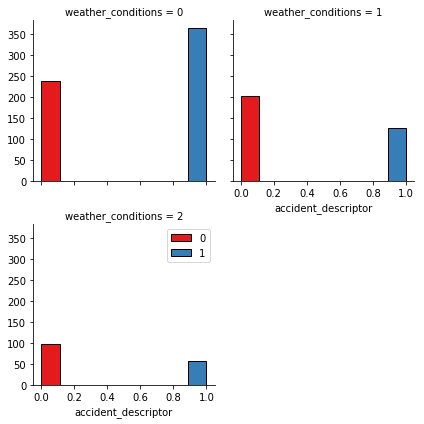

In [10]:
import matplotlib.pyplot as plt

bins = np.linspace(df_weather.accident_descriptor.min(), df_weather.accident_descriptor.max(), 10)
g = sns.FacetGrid(df_weather, col="weather_conditions", hue="accident_descriptor", palette="Set1", col_wrap=2)
g.map(plt.hist, 'accident_descriptor', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

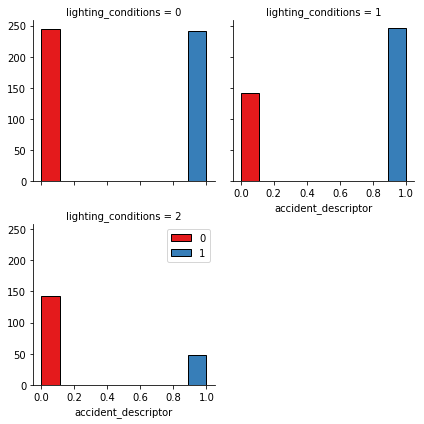

In [11]:
df_lighting = df_upsampled[df_upsampled['lighting_conditions'] < 3]
bins = np.linspace(df_lighting.accident_descriptor.min(), df_lighting.accident_descriptor.max(), 10)
g = sns.FacetGrid(df_lighting, col="lighting_conditions", hue="accident_descriptor", palette="Set1", col_wrap=2)
g.map(plt.hist, 'accident_descriptor', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

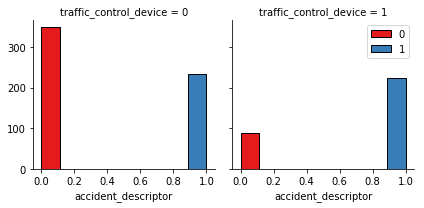

In [12]:
df_traffic = df_upsampled[df_upsampled['traffic_control_device'] < 2]
bins = np.linspace(df_traffic.accident_descriptor.min(), df_traffic.accident_descriptor.max(), 10)
g = sns.FacetGrid(df_traffic, col="traffic_control_device", hue="accident_descriptor", palette="Set1", col_wrap=2)
g.map(plt.hist, 'accident_descriptor', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [13]:
X = df_upsampled[['lighting_conditions', 'weather_conditions', 'traffic_control_device', 'road_surface_conditions', 'collision_type_descriptor']]
y = df_upsampled['accident_descriptor'].values
X= preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6626016260162602 with k= 7


In [15]:
k = mean_acc.argmax()+1

KNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

KNN_yhat = neigh.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, KNN_yhat, average='weighted') )
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, KNN_yhat))


Avg F1-score: 0.6293
Jaccard score: 0.6301


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree.fit(X_trainset,y_trainset)
predTree = decTree.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6070460704607046


In [18]:
predTree = decTree.predict(X_testset)
print("Avg F1-score: %.4f" % f1_score(y_testset, predTree, average='weighted') )
print("Jaccard score: %.4f" % jaccard_similarity_score(y_testset, predTree))

Avg F1-score: 0.6063
Jaccard score: 0.6070


In [19]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
SVM_yhat = clf.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, SVM_yhat, average='weighted') )
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, SVM_yhat))

Avg F1-score: 0.6300
Jaccard score: 0.6301


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
log_yhat = LR.predict_proba(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted') )
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))
from sklearn.metrics import log_loss
print("logloss score: %.4f" % log_loss(y_test, log_yhat))

Avg F1-score: 0.5873
Jaccard score: 0.5894
logloss score: 0.6812
